In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df=pd.read_csv(url, sep='\t')
# change column names to lowercase for easier reference
df.columns = [x.lower() for x in df.columns]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [8]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


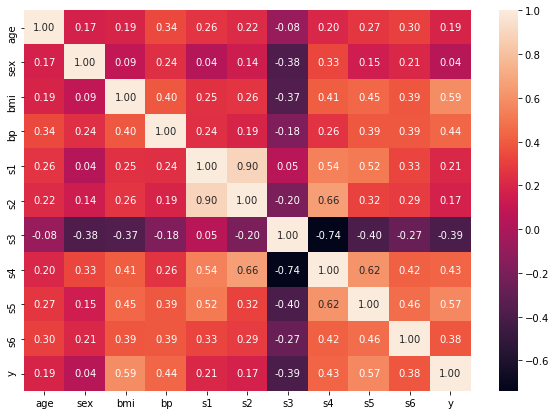

In [9]:

plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [16]:
df['outcome'] = np.where((df['age']>=25) & ((df['bmi']>=30) | (df['s2']<70)),1,0)

In [15]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y,outcome
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151,1
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75,0
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141,1
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206,0
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178,0
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104,0
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132,0
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220,1


In [22]:
df[df['outcome']==1].count().age

117

In [23]:
df1 = df.iloc[:, [0,1,2,5,10,11]]


In [24]:
df1

,age,sex,bmi,s2,y,outcome
0,59,2,32.1,93.2,151,1
1,48,1,21.6,103.2,75,0
2,72,2,30.5,93.6,141,1
3,24,1,25.3,131.4,206,0
4,50,1,23.0,125.4,135,0
...,...,...,...,...,...,...
437,60,2,28.2,113.8,178,0
438,47,2,24.9,166.0,104,0
439,60,2,24.9,106.6,132,0
440,36,1,30.0,125.2,220,1


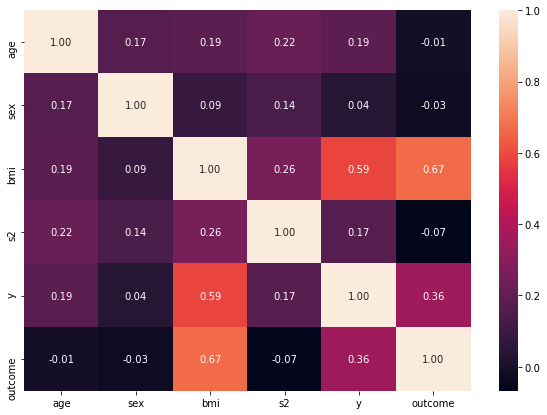

In [25]:
plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(df1.corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='outcome', ylabel='count'>

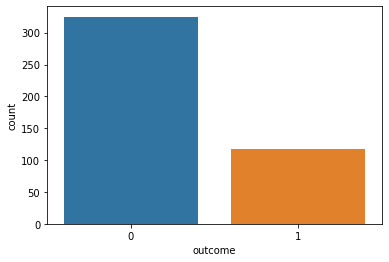

In [26]:
import seaborn as sns
sns.countplot(x = 'outcome',data = df1)

In [27]:
# Selecting features - [Glucose, Insulin, BMI]
X = df1.iloc[:, [0,1,2,3,4]]


In [28]:
X

,age,sex,bmi,s2,y
0,59,2,32.1,93.2,151
1,48,1,21.6,103.2,75
2,72,2,30.5,93.6,141
3,24,1,25.3,131.4,206
4,50,1,23.0,125.4,135
...,...,...,...,...,...
437,60,2,28.2,113.8,178
438,47,2,24.9,166.0,104
439,60,2,24.9,106.6,132
440,36,1,30.0,125.2,220


In [29]:
Y = df1.iloc[:,5]

In [30]:
Y

0      1
1      0
2      1
3      0
4      0
      ..
437    0
438    0
439    0
440    1
441    0
Name: outcome, Length: 442, dtype: int32

In [31]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (353, 5)
X_test shape: (89, 5)
Y_train shape: (353,)
Y_test shape: (89,)


In [33]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [34]:
print(KMeans_Clustering.cluster_centers_)

[[ 51.67361111   1.47222222  29.15763889 120.30138889 234.625     ]
 [ 47.01435407   1.46889952  24.73110048 111.21961722  98.00478469]]


In [35]:
kpred = KMeans_Clustering.predict(X_test)

In [36]:
kpred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0])

In [37]:
sklearn.metrics.classification_report(Y_test,kpred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.32      0.42        66\n           1       0.18      0.43      0.26        23\n\n    accuracy                           0.35        89\n   macro avg       0.40      0.38      0.34        89\nweighted avg       0.51      0.35      0.38        89\n'

In [38]:
print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))


Classification report:

               precision    recall  f1-score   support

           0       0.62      0.32      0.42        66
           1       0.18      0.43      0.26        23

    accuracy                           0.35        89
   macro avg       0.40      0.38      0.34        89
weighted avg       0.51      0.35      0.38        89



In [39]:
from sklearn.metrics.classification import accuracy_score

C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [40]:
accuracy_score(Y_test, kpred)

0.34831460674157305

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, kpred)

In [42]:
cm

array([[21, 45],
       [13, 10]], dtype=int64)

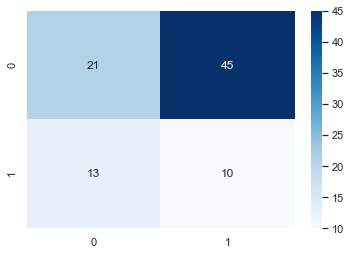

In [43]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [19]:
# KNN

In [47]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=Y)

In [48]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (294, 5)
X_test shape: (148, 5)
Y_train shape: (294,)
Y_test shape: (148,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [50]:
test_scores

[0.722972972972973,
 0.7432432432432432,
 0.7432432432432432,
 0.7567567567567568,
 0.7297297297297297,
 0.7364864864864865,
 0.7567567567567568,
 0.777027027027027,
 0.7635135135135135,
 0.7702702702702703,
 0.7635135135135135,
 0.7702702702702703,
 0.7635135135135135,
 0.777027027027027]

In [51]:
train_scores

[1.0,
 0.8571428571428571,
 0.8741496598639455,
 0.8401360544217688,
 0.8469387755102041,
 0.8367346938775511,
 0.8299319727891157,
 0.8095238095238095,
 0.8333333333333334,
 0.8061224489795918,
 0.8095238095238095,
 0.7891156462585034,
 0.8095238095238095,
 0.7959183673469388]

In [52]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [53]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.7027027027027 % and k = [8, 14]


C:\Users\Rishab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rishab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


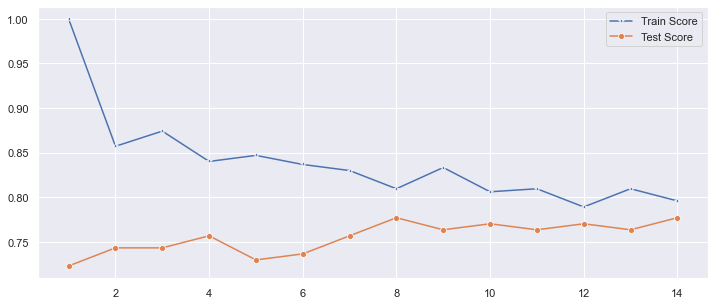

In [54]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [56]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.7635135135135135

In [57]:
knn = KNeighborsClassifier(8)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.777027027027027

In [61]:
knn = KNeighborsClassifier(14)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.777027027027027

In [79]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(Y_test,y_pred)
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted/Actual'], margins=True)

Predicted/Actual,0,1,All
True,,,
0,107,2,109
1,31,8,39
All,138,10,148


In [78]:
# TP = Actual Positive & Predicted Positive
# FP = Actual Negative & Predicted Positive
# FN = Actual Positive & Predicted Negative
# TN = Actual Negative & Predicted Negative

In [70]:
precision = 107/109
precision

0.981651376146789

In [71]:
# Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
#     Recall = TP/(TP+FN)

recall = 107/138
recall

0.7753623188405797

In [77]:
#  F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
#     F1 Score takes into account precision and the recall. 
#     It is created by finding the the harmonic mean of precision and recall.

F1 = 2 * (precision * recall)/(precision + recall)
F1

0.8663967611336033

In [80]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       109
           1       0.80      0.21      0.33        39

    accuracy                           0.78       148
   macro avg       0.79      0.59      0.60       148
weighted avg       0.78      0.78      0.72       148



In [81]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

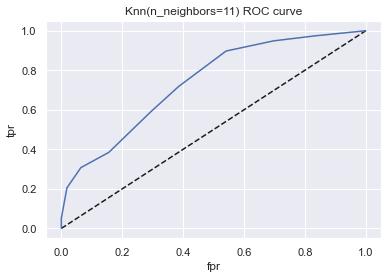

In [82]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [83]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

0.7381792519407198